<a href="https://colab.research.google.com/github/GauravSahani1417/Kaggle-Datasets/blob/master/US_Elections_2020%20Map%20Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/US Elections 2020'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/US Elections 2020/governors_county.csv
/content/drive/MyDrive/US Elections 2020/governors_county_candidate.csv
/content/drive/MyDrive/US Elections 2020/governors_state.csv
/content/drive/MyDrive/US Elections 2020/house_candidate.csv
/content/drive/MyDrive/US Elections 2020/president_county_candidate.csv
/content/drive/MyDrive/US Elections 2020/president_county.csv
/content/drive/MyDrive/US Elections 2020/house_state.csv
/content/drive/MyDrive/US Elections 2020/president_state.csv
/content/drive/MyDrive/US Elections 2020/senate_county.csv
/content/drive/MyDrive/US Elections 2020/senate_state.csv
/content/drive/MyDrive/US Elections 2020/senate_county_candidate.csv


In [3]:
import matplotlib.pyplot as plt #plotting and visulaizing data
import plotly.figure_factory as ff
import plotly.express as px
import time
from datetime import datetime

In [4]:
data = pd.read_csv("/content/drive/MyDrive/US Elections 2020/president_county_candidate.csv")
data.head(5) 

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [11]:
max_voted_candidate = data.groupby('candidate')['total_votes'].sum()
max_voted_candidate = pd.DataFrame(max_voted_candidate)
max_voted_candidate = max_voted_candidate.sort_values(by= 'total_votes',ascending=False)

max_voted_candidate.head(10)

,total_votes
candidate,
Joe Biden,80413404
Donald Trump,74035377
Jo Jorgensen,1856323
Howie Hawkins,393572
Write-ins,177145
Rocky De La Fuente,86487
Gloria La Riva,83838
Kanye West,66397
Don Blankenship,60524


In [12]:
top5_max_voted_candidate = max_voted_candidate.head(5)
top5_max_voted_candidate = top5_max_voted_candidate.reset_index()
#top5_max_voted_candidate.keys()
top5_max_voted_candidate

,candidate,total_votes
0,Joe Biden,80413404
1,Donald Trump,74035377
2,Jo Jorgensen,1856323
3,Howie Hawkins,393572
4,Write-ins,177145


<BarContainer object of 5 artists>

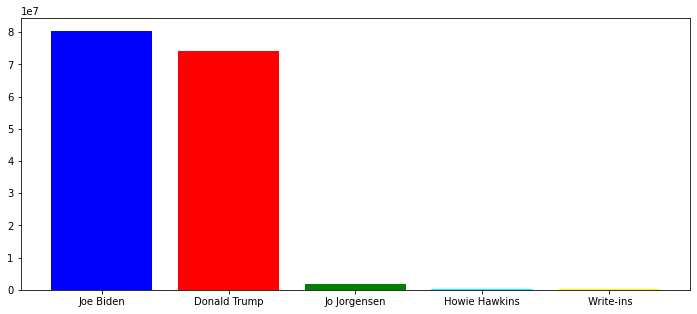

In [19]:
plt.figure(figsize = (12,5))
plt.bar(top5_max_voted_candidate['candidate'], top5_max_voted_candidate['total_votes'], color=[ 'blue', 'red', 'green', 'cyan', 'yellow'] )

In [16]:
max_voted_party = data.groupby('party')['total_votes'].sum()
max_voted_party = pd.DataFrame(max_voted_party)
top5_max_voted_party = max_voted_party.sort_values(by= 'total_votes',ascending=False)
top5_max_voted_party = top5_max_voted_party.head(5)
top5_max_voted_party = top5_max_voted_party.reset_index()
top5_max_voted_party

,party,total_votes
0,DEM,80413404
1,REP,74035377
2,LIB,1856323
3,GRN,396235
4,WRI,177145


<BarContainer object of 5 artists>

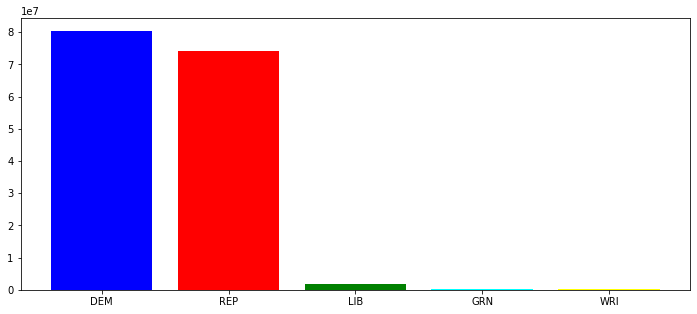

In [18]:
plt.figure(figsize = (12,5))
plt.bar(top5_max_voted_party['party'],top5_max_voted_party['total_votes'], color=[ 'blue', 'red', 'green', 'cyan', 'yellow'])

In [20]:
president_state_data = pd.read_csv('/content/drive/MyDrive/US Elections 2020/president_state.csv')
president_state_data.head()

,state,total_votes
0,Delaware,504010
1,District of Columbia,333682
2,Florida,11067456
3,Georgia,5000987
4,Hawaii,574469


In [23]:
state_codes = pd.read_csv('/content/drive/MyDrive/US Elections 2020/world_country_and_usa_states_latitude_and_longitude_values.csv')
state_codes.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [24]:
datafile = president_state_data.merge(state_codes, left_on='state', right_on='usa_state')

In [26]:
datafile.head(10)

,state,total_votes,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,Delaware,504010,AO,-11.202692,17.873887,Angola,DE,38.910832,-75.527670,Delaware
1,District of Columbia,333682,AN,12.226079,-69.060087,Netherlands Antilles,DC,38.905985,-77.033418,District of Columbia
2,Florida,11067456,AQ,-75.250973,-0.071389,Antarctica,FL,27.664827,-81.515754,Florida
3,Georgia,5000987,AR,-38.416097,-63.616672,Argentina,GA,32.157435,-82.907123,Georgia
4,Hawaii,574469,AS,-14.270972,-170.132217,American Samoa,HI,19.898682,-155.665857,Hawaii
5,Idaho,868125,AU,-25.274398,133.775136,Australia,ID,44.068202,-114.742041,Idaho
6,Illinois,5992492,AW,12.521110,-69.968338,Aruba,IL,40.633125,-89.398528,Illinois
7,Indiana,3035088,AZ,40.143105,47.576927,Azerbaijan,IN,40.551217,-85.602364,Indiana
8,Iowa,1688310,AT,47.516231,14.550072,Austria,IA,41.878003,-93.097702,Iowa
9,Kansas,1334330,BA,43.915886,17.679076,Bosnia and Herzegovina,KS,39.011902,-98.484246,Kansas


In [29]:
fig = px.choropleth(datafile,locations='usa_state_code', color="total_votes",
                           locationmode = 'USA-states',
                           scope="usa",
                           color_continuous_scale = 'RdBu',
                           hover_name="state",
                           title='USA Presidential Votes Counts' 
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()